<a href="https://colab.research.google.com/github/PhantomBlade009/music_files/blob/main/Auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Q8 and Q9

#Questions have been solved below

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
import matplotlib.pyplot as plt
from scipy import stats 
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mscaudill/IntroStatLearn/master/data/Auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df = df.replace(['?'], np.nan)

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [ ]:
df.dropna(inplace=True) 
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

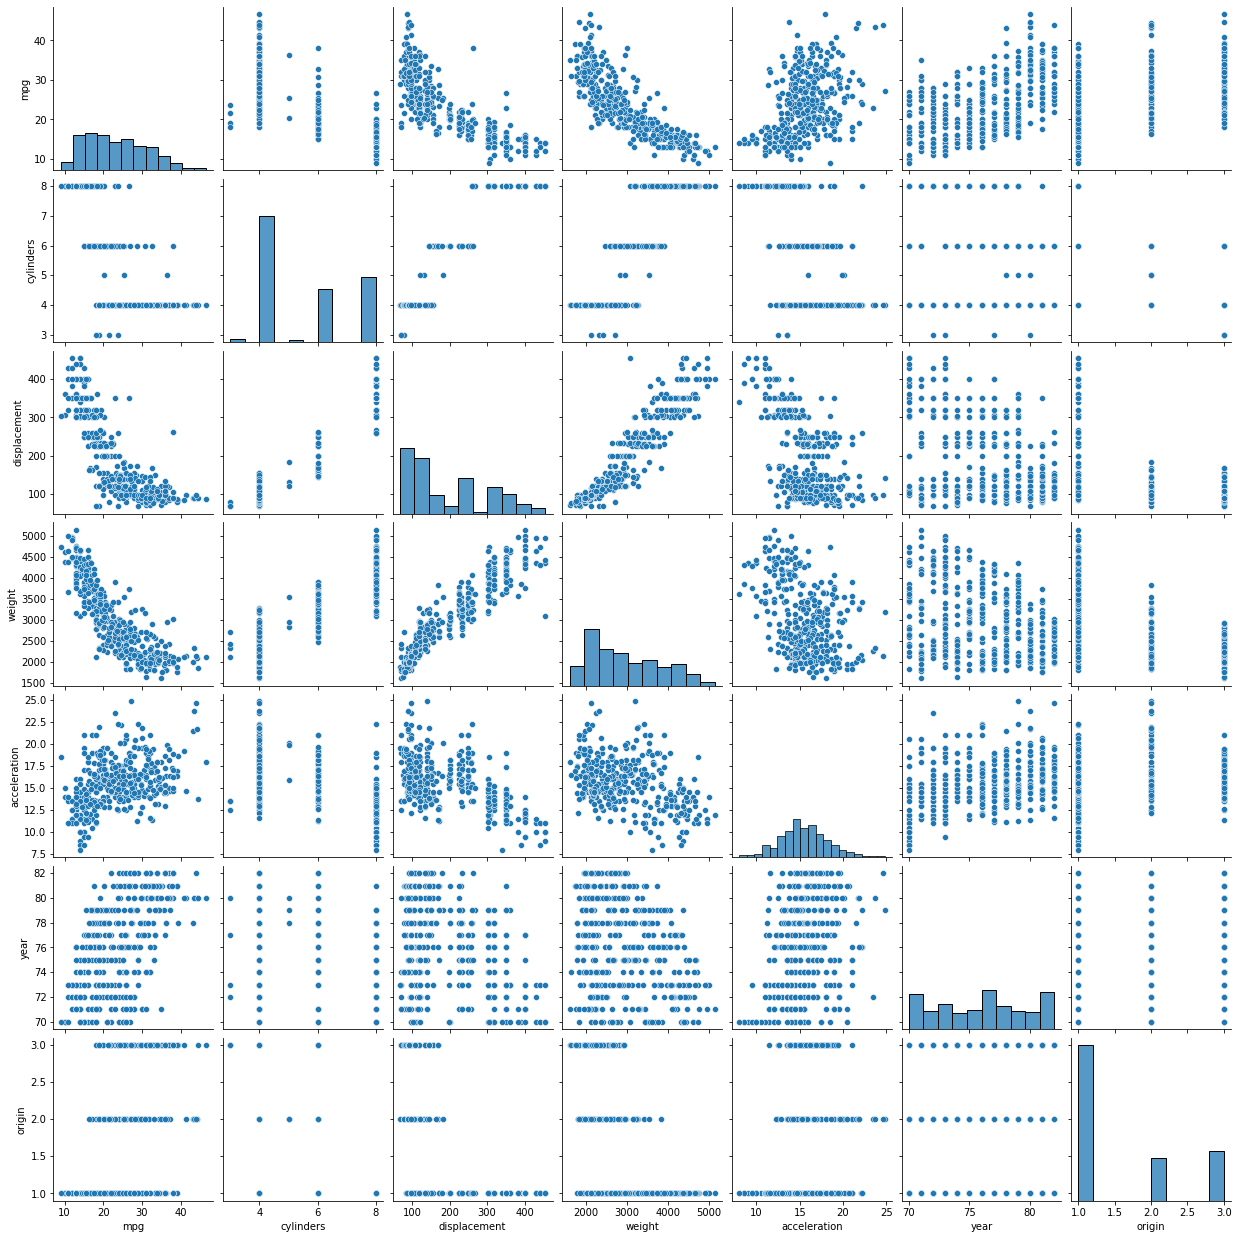

In [ ]:
sns.pairplot(df)

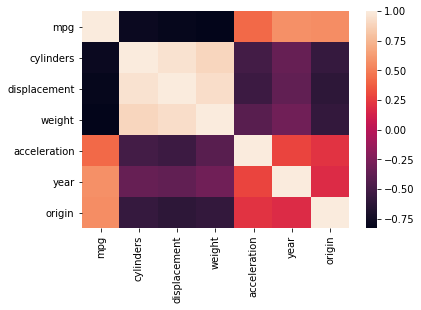

In [ ]:
corr = df.corr() 
sns.heatmap(corr, )

In [ ]:
X = df['horsepower'].values
X = X.astype(np.float).reshape(-1,1)
y = df['mpg'].values.reshape(-1,1)
print(X.shape, y.shape) 
print(df.dtypes)

(392, 1) (392, 1)
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object


In [ ]:
lr = LinearRegression() 
lr.fit(X,y)
y_predict = lr.predict(X) 


In [ ]:
def summary(X, y, y_predict, lr):
  from scipy import stats
  from sklearn.metrics import r2_score 
  from sklearn.metrics import mean_squared_error

  n = X.shape[0] 
  p = X.shape[1] 
  R2 = r2_score(y,y_predict) 
  adjusted_r2 = 1- (1-R2)*((n-1)/(n-p-1)) 
  RMSE = mean_squared_error(y,y_predict)**(1/2) 
  print("RMSE = ", RMSE) 
  print("R2 Score = ", R2)
  print("Adjusted R2 =" ,adjusted_r2) 

  weights = np.append(lr.intercept_,lr.coef_)

  #newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
  #MSE = (mean_squared_error(y, y_predict_tot))/(len(newX)-len(newX.columns))

  # Note if you don't want to use a DataFrame replace the two lines above with
  newX = np.append(np.ones((len(X),1)), X, axis=1)
  MSE = (sum((y-y_predict)**2))/(newX.shape[0]-newX.shape[1])


  var_b = MSE*(np.linalg.pinv(np.dot(newX.T,newX)).diagonal())
  sd_b = np.sqrt(var_b)
  ts_b = weights/ sd_b

  p_values =[2.0*(1.0-stats.t.cdf(np.abs(i),(newX.shape[0]-newX.shape[1]))) for i in ts_b]

  sd_b = np.round(sd_b,3)
  ts_b = np.round(ts_b,3)
  p_values = np.round(p_values,100)
  weights = np.round(weights,4)

  myDF3 = pd.DataFrame()
  myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [weights,sd_b,ts_b,p_values]
  print(myDF3)

  interval_95 = pd.DataFrame(np.column_stack((weights-2*sd_b, weights+2*sd_b)), columns=['LowerBound', 'UpperBound'])
  print('95 per intervals')
  print(interval_95)
  return

In [ ]:
summary(X,y,y_predict,lr)

RMSE =  4.893226230065713
R2 Score =  0.6059482578894348
Adjusted R2 = 0.6049378688071001
   Coefficients  Standard Errors  t values  Probabilities
0       39.9359            0.717    55.660            0.0
1       -0.1578            0.006   -24.489            0.0
95 per intervals
   LowerBound  UpperBound
0     38.5019     41.3699
1     -0.1698     -0.1458


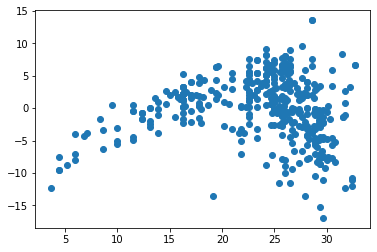

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_predict, y_predict - y)

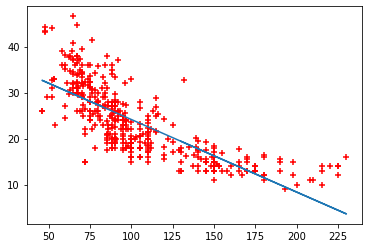

In [ ]:
plt.plot(X,y_predict_tot) 
plt.scatter(X,y, marker= "+", c = 'Red') 
plt.show()

In [ ]:
X = df.iloc[:,1:df.shape[1]-1].values
X = X.astype(np.float)
y = df['mpg'].values.reshape(-1,1)
print(X.shape, y.shape) 

(392, 7) (392, 1)


In [ ]:
lr = LinearRegression() 
lr.fit(X, y) 
y_predict = lr.predict(X)



In [ ]:
summary(X,y,y_predict,lr)

RMSE =  3.2935514183022025
R2 Score =  0.8214780764810599
Adjusted R2 = 0.8182237705835792
   Coefficients  Standard Errors  t values  Probabilities
0      -17.2184            4.644    -3.707   2.401841e-04
1       -0.4934            0.323    -1.526   1.277965e-01
2        0.0199            0.008     2.647   8.444649e-03
3       -0.0170            0.014    -1.230   2.196328e-01
4       -0.0065            0.001    -9.929   0.000000e+00
5        0.0806            0.099     0.815   4.154780e-01
6        0.7508            0.051    14.729   0.000000e+00
7        1.4261            0.278     5.127   4.665681e-07
95 per intervals
   LowerBound  UpperBound
0    -26.5064     -7.9304
1     -1.1394      0.1526
2      0.0039      0.0359
3     -0.0450      0.0110
4     -0.0085     -0.0045
5     -0.1174      0.2786
6      0.6488      0.8528
7      0.8701      1.9821


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


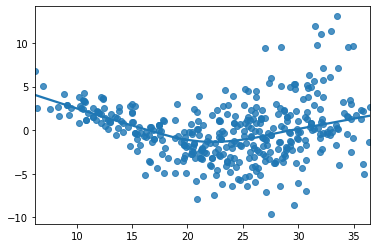

In [ ]:
sns.regplot(x= y_predict, y= y-y_predict, lowess=True)

In [ ]:
import statsmodels.api as sm 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X = sm.add_constant(df.iloc[:, 1:df.shape[1]-1])
y = df['mpg'] 
X = X.astype(np.float)
X.shape

(392, 8)

Same using stats models

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 13 Apr 2021   Prob (F-statistic):          2.04e-139
Time:                        13:16:25   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

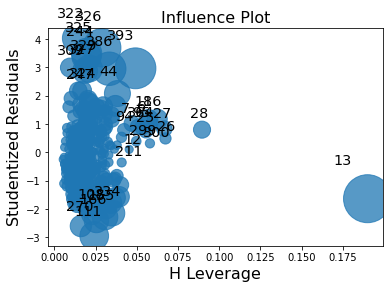

In [ ]:
model = sm.OLS(y,X).fit()
y_predict = model.predict(X) 
print(model.summary())
print(sm.graphics.influence_plot(model, criterion='cooks'))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True,include_bias=False)
X = df.iloc[:,1:df.shape[1]-1]
X = X.astype(np.float) 
X = poly.fit_transform(X)

RMSE =  3.2935514183022025
R2 Score =  0.8214780764810599
Adjusted R2 = 0.8182237705835792
   Coefficients  Standard Errors  t values  Probabilities
0      -17.2184            4.644    -3.707   2.401841e-04
1       -0.4934            0.323    -1.526   1.277965e-01
2        0.0199            0.008     2.647   8.444649e-03
3       -0.0170            0.014    -1.230   2.196328e-01
4       -0.0065            0.001    -9.929   0.000000e+00
5        0.0806            0.099     0.815   4.154780e-01
6        0.7508            0.051    14.729   0.000000e+00
7        1.4261            0.278     5.127   4.665681e-07
95 per intervals
   LowerBound  UpperBound
0    -26.5064     -7.9304
1     -1.1394      0.1526
2      0.0039      0.0359
3     -0.0450      0.0110
4     -0.0085     -0.0045
5     -0.1174      0.2786
6      0.6488      0.8528
7      0.8701      1.9821


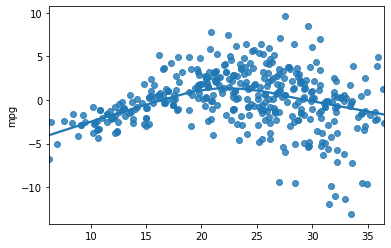

In [ ]:
lr.fit(X,y)
y_predict = lr.predict(X)
summary(X,y,y_predict,lr)
sns.regplot(x=y_predict, y = y_predict-y, lowess=True)

In [ ]:
X = df.iloc[:, 1:df.shape[1]-1]
X = X.astype(np.float) 
X = np.column_stack((np.log(X), np.sqrt(X), X**2))

RMSE =  2.5250534734506775
R2 Score =  0.8950689977569362
Adjusted R2 = 0.8891134543863839
    Coefficients  Standard Errors     t values  Probabilities
0     65365.7103            0.011  6093831.276   0.000000e+00
1       521.1303            0.004   145355.937   0.000000e+00
2       -40.5244            0.020    -2073.036   0.000000e+00
3        11.1314            0.029      386.369   0.000000e+00
4        79.7661            0.061     1318.216   0.000000e+00
5       142.6753            0.022     6433.488   0.000000e+00
6    -35284.6450            0.041  -857487.933   0.000000e+00
7        -0.5376            0.017      -32.520   0.000000e+00
8      -583.6462            0.005  -123396.951   0.000000e+00
9         6.6983            0.237       28.258   0.000000e+00
10       -4.9182            0.027     -180.266   0.000000e+00
11       -4.3673            0.045      -97.048   0.000000e+00
12     -107.3883            0.029    -3709.922   0.000000e+00
13    10689.2062            0.070   15197

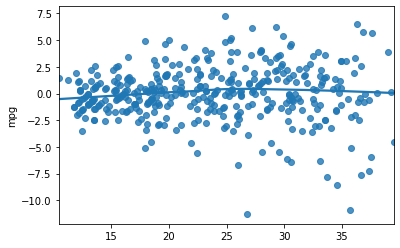

In [ ]:
lr.fit(X,y)
y_predict = lr.predict(X)
summary(X,y,y_predict,lr)
sns.regplot(x=y_predict, y = y_predict-y,lowess=True)

#Q8 
i) Yes there is a relation ship between Horspower and MPG since p-value is practically zero 

ii) The relation ship between Horsepower and MPG is not very strong since the magnitude of coefficient associated with it is small ~ 0.16

iii)The relationship between the predictor and target is negative in nature

iv) The value of target at predictor value 98 is 39.94 - 0.16(98) = 24.26

b) Plotted the graph, can be found above 

c) Plotted the diagnotic plot, can be seen  above, it has a trumpet like shape which suggests non linearity in relation ship between predictor and target



#Q9 
a) Plotted scatter plot above can be seen 

b) Plotted correlation matric above 

c) i) High F-Statistics of 254 shows good relationship between predictors and target 

c) ii) Displacement, weight, year and origin are statistically significant since their p-values are below alpha value of 0.05 

c) iii) Coefficient of year suggests that as year increases mpg increases 

d) Diagnostic Plots have been plotted above 
It shows some Non linearity, there are high leverage points such as observation 13, and also potential outliers 

e) There are some interactions which are statistically significant but also many which are not, including interaction features increases R2 value from 0.8 to 0.89 

f) Log(X) and sqrt(X) are better performers than simple features, this was also seen through the diverging or fanning nature of residual vs predictions plot 
